## Principal Component Analysis (PCA):

### Q.1) The goal of this notebook is to identify the principal components of a dataset containing key economic and social indicators for different countries.
#### The dataset contains information on the following variables:
    1. Child Mortality: Deaths of children under 5 years per 1000 live births.
    2. Exports and Imports: Percentage of GDP dedicated to international trade.
    3. Health Expenditure: Total health spending as a percentage of GDP.
    4. Net Income: Average income per person.
    5. Inflation: Annual growth rate of the price index.
    6. Life Expectancy: Average lifespan at birth.
    7. Fertility Rate: The number of children per woman.
    8. GDP Per Capita: The country's GDP per person.

#### __Instructions__:

- Standardize the dataset (exclude the country column) using only numpy and pandas. Explain why standardization is necessary.
- Compute the covariance matrix of the standardized data. Explain the importance of this matrix in PCA.
- Find the eigenvalues and eigenvectors of the covariance matrix using numpy.
- Determine the principal components of the dataset. Explain what the principal components represent in this context.
- Plot the variance explained by each principal component and interpret the results. How many components would you retain to explain most of the variance in the dataset?
- Project the original data onto the new principal component axes to reduce the dimensionality. Provide a 2D or 3D visualization of the data.

Dataset Information: You are provided with a dataset containing economic and health-related indicators for various countries. Your task is to explore patterns in this data by reducing its dimensionality while preserving as much information as possible.

#### Sample Solution:

Relevant Imports:

In [1]:
import pandas as pd
import numpy as np

Loading the dataset using `pandas`

In [2]:
file = r'datasets/Country-data.csv'
data = pd.read_csv(file)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Excluding the `country` column since it is a categorical column and cannot be a part of PCA

In [3]:
df = data.iloc[:, 1:]
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Standardizing the data:

In [4]:
def mean(nums: list[int | float]) -> float:
    return sum(nums) / len(nums)

def stdev(nums: list[int | float]) -> float:
    mn = mean(nums)
    n = len(nums)
    total = sum((num - mn) ** 2 for num in nums)
    return np.sqrt(total / (n - 1))

def standardize(df: pd.DataFrame) -> pd.DataFrame:
    df_copy = df.copy()  # Create a copy to preserve the original DataFrame
    cols = df_copy.columns.tolist()
    for col in cols:
        nums = df_copy[col].tolist()
        mn = mean(nums)
        sd = stdev(nums)
        df_copy[col] = [(x - mn) / sd for x in nums]
    return df_copy


In [5]:
df_scaled = standardize(df)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [6]:
for col in df_scaled.columns:
    print("mean: ", int(mean(df_scaled[col].tolist())))
    print("stdev: ", int(stdev(df[col].tolist())))

mean:  0
stdev:  40
mean:  0
stdev:  27
mean:  0
stdev:  2
mean:  0
stdev:  24
mean:  0
stdev:  19278
mean:  0
stdev:  10
mean:  0
stdev:  8
mean:  0
stdev:  1
mean:  0
stdev:  18328


Calculate the covariance matrix:

In [7]:
def covariance(x: list[int | float], y: list[int | float]) -> float:
    n = len(x)
    cov_sum = 0
    for i in range(n):
        cov_sum += x[i] * y[i]
    return cov_sum / (n-1)

In [8]:
n = len(df_scaled.columns)
# Initialize a matrix with all elements 0:
cov_mat = [[0 for _ in range(n)] for _ in range(n)]

# Fill the covariance matrix:
for i in range(n):
    for j in range(n):
        cov_mat[i][j] = covariance(df_scaled.iloc[:, i].tolist(), df_scaled.iloc[:, j].tolist())


# Print the covariance matrix to visualize it:
for row in cov_mat:
    print(row)

[1.0000000000000007, -0.3180932226449491, -0.20040205881029735, -0.1272109199387606, -0.5243150164994347, 0.28827616802271466, -0.8866760973367762, 0.848478110556671, -0.483032166216782]
[-0.3180932226449491, 0.9999999999999997, -0.11440840246461279, 0.7373808339554987, 0.5167836027021384, -0.1072943925519458, 0.3163126049554798, -0.32001055003580786, 0.41872475100132345]
[-0.20040205881029735, -0.11440840246461279, 1.0000000000000004, 0.09571667808670573, 0.12957860504935115, -0.2553757928439111, 0.21069212144020819, -0.19667398827210916, 0.3459655251954039]
[-0.1272109199387606, 0.7373808339554987, 0.09571667808670573, 1.0, 0.12240624865259929, -0.2469942794965647, 0.054390534928787385, -0.15904843378201772, 0.11549816977950142]
[-0.5243150164994347, 0.5167836027021384, 0.12957860504935115, 0.12240624865259929, 0.9999999999999998, -0.14775599560926272, 0.6119624680973174, -0.5018400532297549, 0.8955714330875306]
[0.28827616802271466, -0.1072943925519458, -0.2553757928439111, -0.24699

- Calculate the eigenvalues and eigenvectors directly by using `np.linalg`.
- Find the principal components.

In [9]:
# Calculate the eigenvalues and eigenvectors:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

# Sort them according to eigenvalues in descending order:
sorted_indices = np.argsort(eigenvalues)[::-1]

sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Map the eigenvectors to the original feature names:
features = df_scaled.columns.tolist()
sorted_features = [features[i] for i in sorted_indices]

In [12]:
principal_components = {
    "Eigenvalues": sorted_eigenvalues,
    "Features: ": sorted_features,
    "Principal Components": [f"PC{i + 1}" for i in range(n)]
}
pd.DataFrame(principal_components)

,Eigenvalues,Features:,Principal Components
0,4.135657,child_mort,PC1
1,1.546346,exports,PC2
2,1.170383,health,PC3
3,0.994785,imports,PC4
4,0.660619,income,PC5
5,0.223581,inflation,PC6
6,0.113439,gdpp,PC7
7,0.088315,total_fer,PC8
8,0.066875,life_expec,PC9


Projecting Data onto Principal Components:

In [11]:
# Project the standardized data onto the principal components (eigenvectors):
principal_data = np.dot(df_scaled.values, sorted_eigenvectors)

# Create a new DataFrame with principal components:
df_pca = pd.DataFrame(data=principal_data, columns=[f'PC{i+1}' for i in range(n)])

# If needed, add back the country column:
df_pca.insert(0, 'country', data['country'])
df_pca.head()


,country,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,Afghanistan,-2.904290,0.095334,-0.715965,-1.002240,-0.157835,0.253834,0.381852,0.413831,0.014106
1,Albania,0.428622,-0.586392,-0.332486,1.157577,0.174154,-0.084325,0.248172,-0.220380,-0.172796
2,Algeria,-0.284370,-0.453810,1.217842,0.865511,0.156005,0.400491,-0.086952,-0.183610,-0.083785
3,Angola,-2.923630,1.690471,1.520471,-0.837107,-0.272390,0.546353,-0.439513,-0.354930,0.091065
4,Antigua and Barbuda,1.030477,0.136249,-0.225044,0.844523,-0.192428,0.206298,0.241252,-0.023610,-0.093987


Plot the variance explained by each Principal Component:

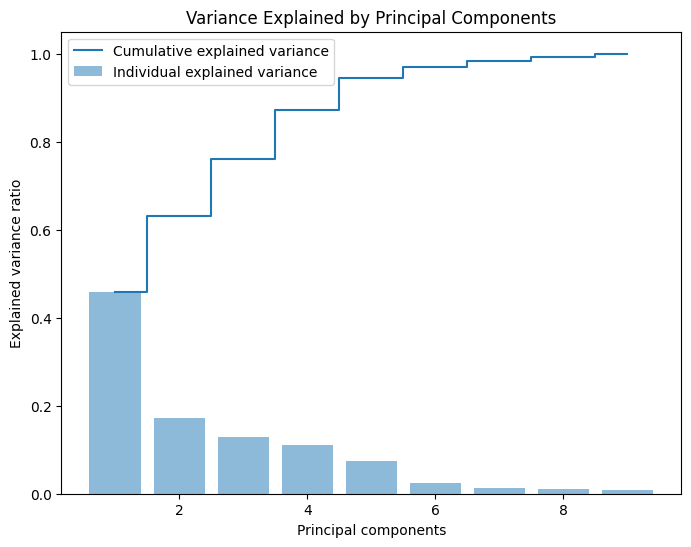

In [13]:
import matplotlib.pyplot as plt

# Calculate variance explained:
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Cumulative variance explained:
cumulative_variance = np.cumsum(explained_variance)

# Plotting the variance explained:
plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Variance Explained by Principal Components')
plt.show()


Visualization of PCA:

2D:

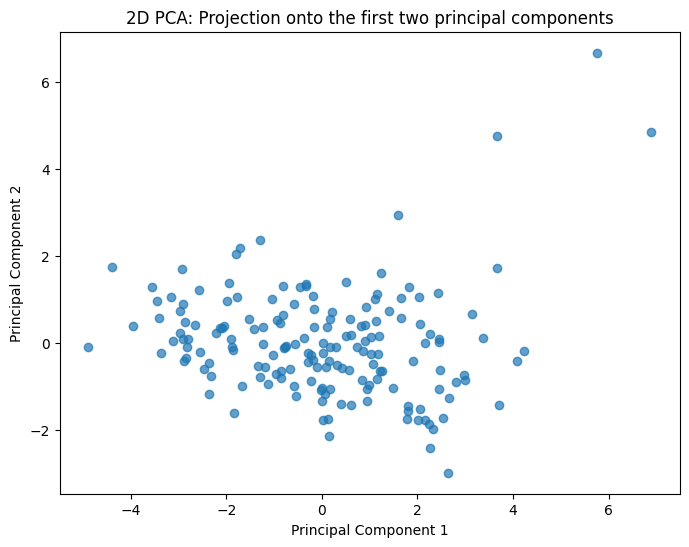

In [14]:
# Select the first two principal components:
df_pca_2d = df_pca[['PC1', 'PC2']]

# Scatter plot of the first two principal components:
plt.figure(figsize=(8,6))
plt.scatter(df_pca_2d['PC1'], df_pca_2d['PC2'], alpha=0.7)
plt.title('2D PCA: Projection onto the first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


3D: